In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import ops
from keras import layers
import os
import numpy as np
from matplotlib import rcParams
import matplotlib.font_manager as fm
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [2]:
df=pd.read_json("/kaggle/input/bangla-newspaper-dataset/data_v2/data_v2.json")

In [3]:
my_image=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/twitter.png"))

In [4]:

font_path = fm.FontProperties(fname="/kaggle/input/elegant-and-functional-fonts/Ador Noirrit Web.otf")

In [5]:
df.head()

,author,category,category_bn,published_date,modification_date,tag,comment_count,title,url,content
0,গাজীপুর প্রতিনিধি,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২৩:২৬","০৪ জুলাই ২০১৩, ২৩:২৭",[গাজীপুর],0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",http://www.prothom-alo.com/bangladesh/article/...,গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,অনলাইন ডেস্ক,sports,খেলা,"০৪ জুলাই ২০১৩, ২৩:০৯","০৪ জুলাই ২০১৩, ২৩:১১",[টেনিস],0,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,http://www.prothom-alo.com/sports/article/19028,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,নিজস্ব প্রতিবেদক,bangladesh,বাংলাদেশ,"০৪ জুলাই ২০১৩, ২২:২৫","০৪ জুলাই ২০১৩, ২৩:১২",[রাজনীতি],0,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,http://www.prothom-alo.com/bangladesh/article/...,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৭","০৪ জুলাই ২০১৩, ২১:৪৫",[গবেষণা],0,পাসওয়ার্ড ভুলে যান!,http://www.prothom-alo.com/technology/article/...,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,অনলাইন ডেস্ক,technology,বিজ্ঞান ও প্রযুক্তি,"০৪ জুলাই ২০১৩, ২১:৩৫","০৪ জুলাই ২০১৩, ২১:৩৭",[কম্পিউটার],0,চলে গেলেন মাউস উদ্ভাবক,http://www.prothom-alo.com/technology/article/...,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...


In [6]:
df['tag'] = df['tag'].apply(lambda x: [i[1:-1] if isinstance(i, str) and i.startswith('[') and i.endswith(']') else i for i in x])



In [7]:
df.drop(columns=["category","published_date","modification_date","comment_count","url"],axis=1,inplace=True)

In [8]:
df.shape

(408471, 5)

In [9]:
df.isnull().sum()

author         0
category_bn    0
tag            0
title          0
content        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408471 entries, 0 to 408470
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   author       408471 non-null  object
 1   category_bn  408471 non-null  object
 2   tag          408471 non-null  object
 3   title        408471 non-null  object
 4   content      408471 non-null  object
dtypes: object(5)
memory usage: 15.6+ MB


# author count plot

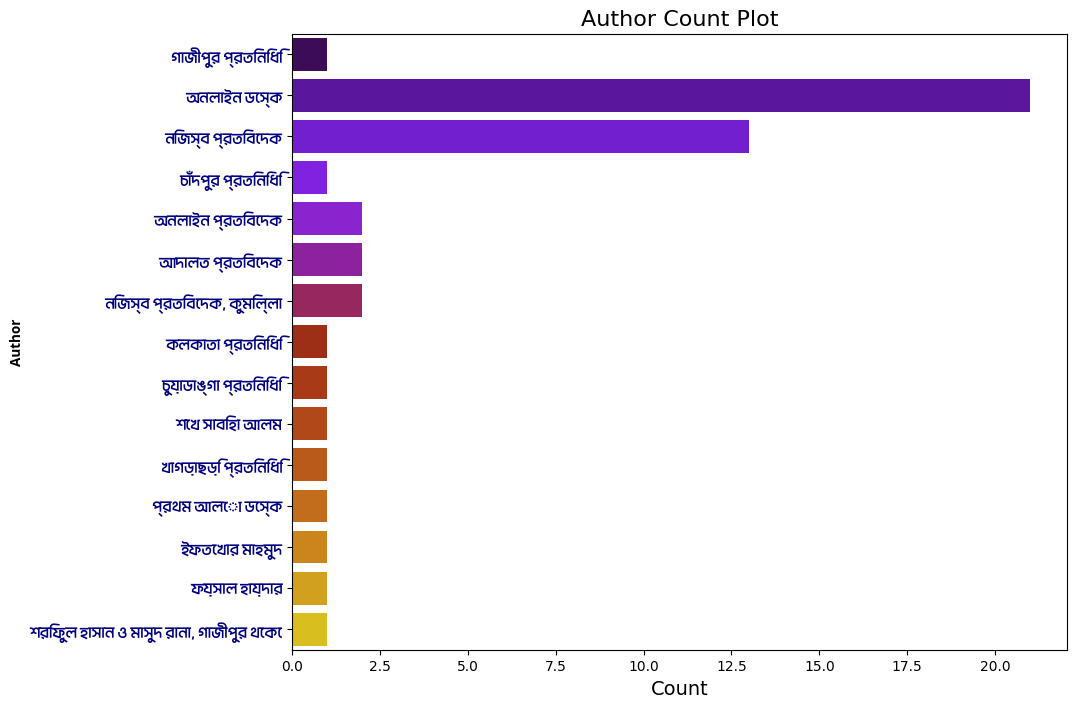

In [11]:

plt.figure(figsize=(10, 8))
sns.countplot(y="author", data=df[:50], palette="gnuplot")

plt.title("Author Count Plot", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Author",fontproperties=font_path, fontsize=14)
plt.yticks(fontproperties=font_path, fontsize=15, color="navy")
plt.show()



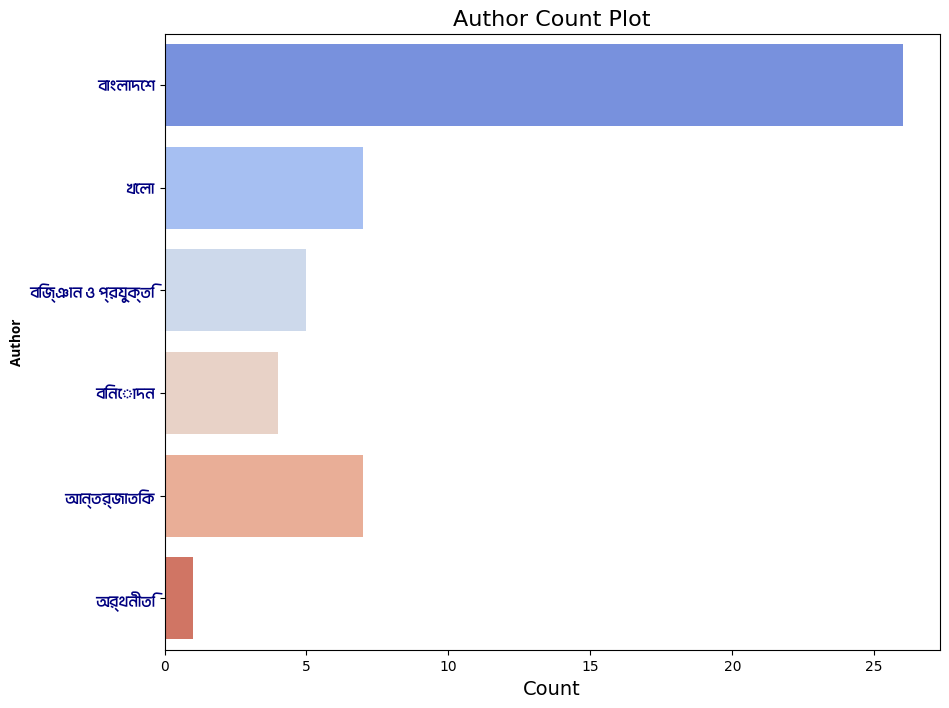

In [12]:

plt.figure(figsize=(10, 8))
sns.countplot(y="category_bn", data=df[:50], palette="coolwarm")

plt.title("Author Count Plot", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Author",fontproperties=font_path, fontsize=14)
plt.yticks(fontproperties=font_path, fontsize=15, color="navy")
plt.show()


In [13]:
def remove_brackets(text):
    # Initialize result string
    result = ""
    # Track if we're inside brackets
    in_bracket = False
    # Track the content inside brackets
    bracket_content = ""
    
    for char in text:
        if char == '[':
            in_bracket = True
            continue
        elif char == ']':
            in_bracket = False
            # Add the bracket content without the brackets
            result += bracket_content
            bracket_content = ""
            continue
            
        if in_bracket:
            bracket_content += char
        else:
            result += char
            
    return result

# Apply the function to the tag column
df['tag'] = df['tag'].apply(remove_brackets)

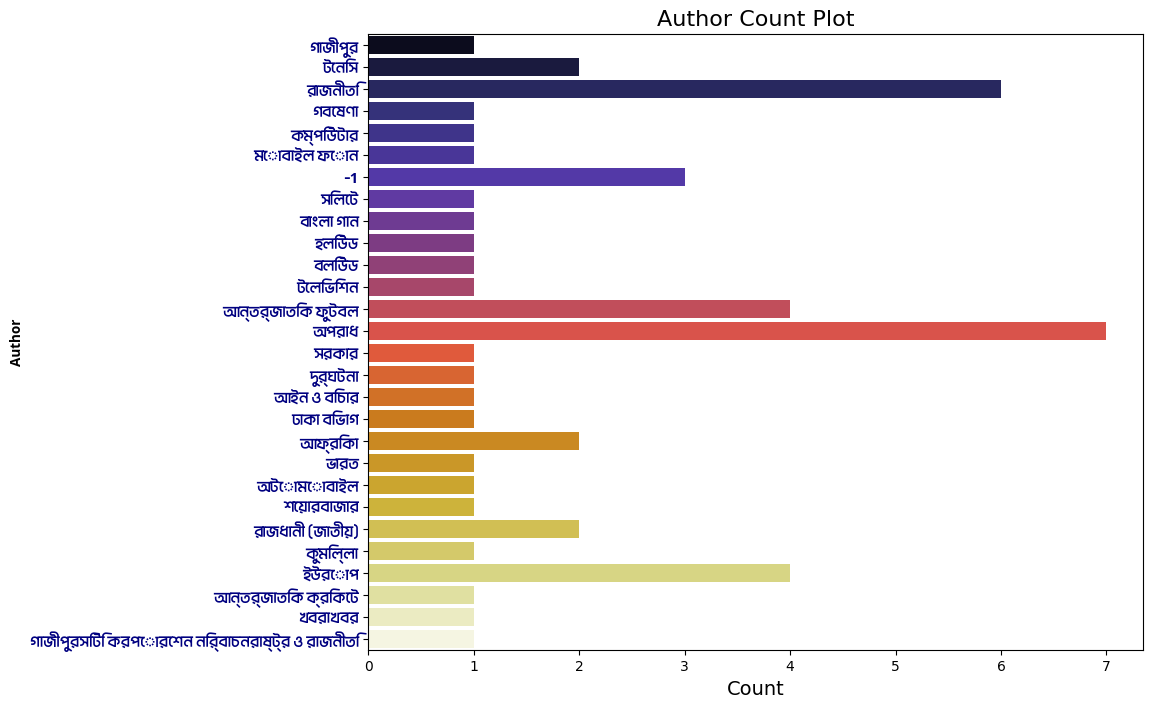

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(y="tag", data=df[:50], palette="CMRmap")

plt.title("Author Count Plot", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Author",fontproperties=font_path, fontsize=14)
plt.yticks(fontproperties=font_path, fontsize=15, color="navy")
plt.show()


In [15]:
df["text"]=df["author"]+ " " +df["tag"]+" "+df["title"]+" "+df["content"]

In [16]:
df.drop(columns=["author","tag","title","content"],axis=1,inplace=True)

In [17]:
df["category_bn"].value_counts()

category_bn
বাংলাদেশ                                                                                232686
খেলা                                                                                     48360
আন্তর্জাতিক                                                                              30826
বিনোদন                                                                                   30438
অর্থনীতি                                                                                 17229
মতামত                                                                                    15669
বিজ্ঞান ও প্রযুক্তি                                                                      12033
জীবনযাপন                                                                                 10783
শিক্ষা                                                                                    9720
বিশ্বকাপ ক্রিকেট ২০১৯ | সময়সূচি, লাইভ স্কোর, পয়েন্ট টেবিল, কুইজ ও খেলার আপডেট নিউজ       561
আজকের পত্রিকা                         

In [18]:
def clean_category(df):
    # Create a pattern for the characters to remove
    patterns = [
        'ржмрж╛ржВрж▓рж╛ржжрзЗрж╢',
        'ржорждрж╛ржоржд',
        'ржЖржирзНрждрж░рзНржЬрж╛рждрж┐ржХ',
        'ржмрж┐ржирзЛржжржи'
    ]
    
    # Function to remove patterns from a string
    def remove_patterns(text):
        if isinstance(text, str):
            for pattern in patterns:
                text = text.replace(pattern, '')
            # Remove extra whitespace
            text = ' '.join(text.split())
        return text
    
    # Apply the cleaning function to the category_bn column
    df['category_bn'] = df['category_bn'].apply(remove_patterns)
    
    return df

df = clean_category(df)

In [19]:
def simplify_categories(text):
    if isinstance(text, str):
        # Define mappings for long categories
        mappings = {
            'বিশ্বকাপ ক্রিকেট ২০১৯ | সময়সূচি, লাইভ স্কোর, পয়েন্ট টেবিল, কুইজ ও খেলার আপডেট নিউজ': 'বিশ্বকাপ ক্রিকেট',
            
        }
        
        # Return simplified version if it exists in mappings
        return mappings.get(text.strip(), text.strip())
    return text

# Apply to DataFrame:
df['category_bn'] = df['category_bn'].apply(simplify_categories)

In [20]:
df["category_bn"].value_counts()

category_bn
বাংলাদেশ                                         232686
খেলা                                              48360
আন্তর্জাতিক                                       30826
বিনোদন                                            30438
অর্থনীতি                                          17229
মতামত                                             15669
বিজ্ঞান ও প্রযুক্তি                               12033
জীবনযাপন                                          10783
শিক্ষা                                             9720
বিশ্বকাপ ক্রিকেট                                    561
আজকের পত্রিকা                                        97
রাশিয়া বিশ্বকাপ ফুটবল ২০১৮ - খেলার আপডেট নিউজ        19
                                                     18
পাওয়া যায়নি                                        15
উত্তর আমেরিকা                                        14
ছবি                                                   1
পরীক্ষামূলক পেজ                                       1
অন্য আলো                            

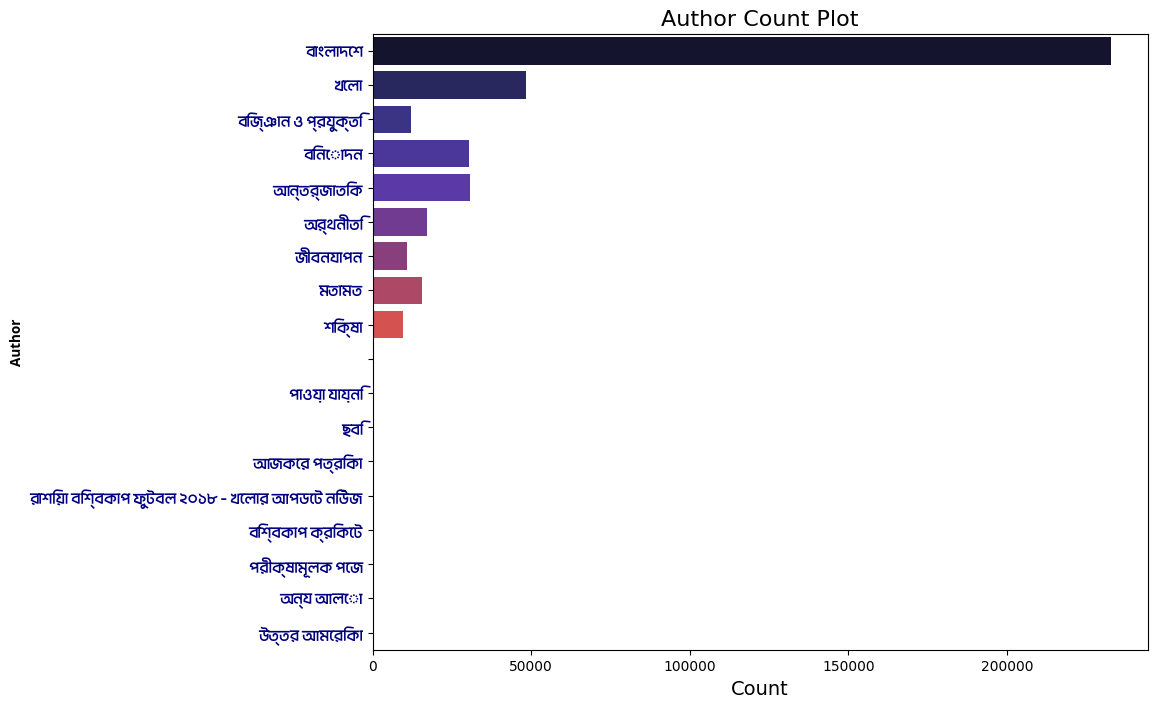

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(y="category_bn", data=df, palette="CMRmap")

plt.title("Author Count Plot", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Author",fontproperties=font_path, fontsize=14)
plt.yticks(fontproperties=font_path, fontsize=15, color="navy")
plt.show()

# WordCloud

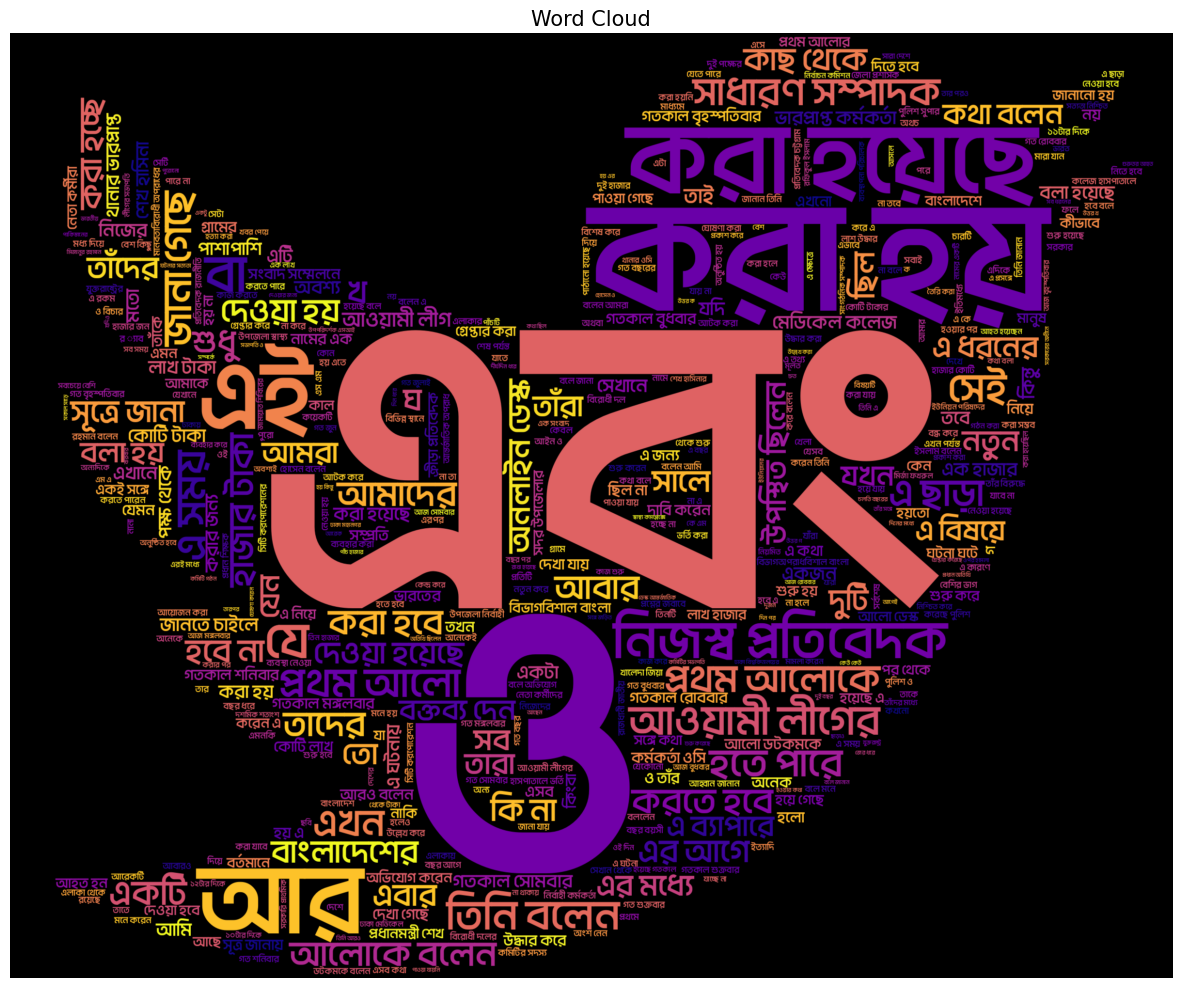

In [22]:
my_font="/kaggle/input/elegant-and-functional-fonts/Ador Noirrit Web.otf"

text = ' '.join(df["text"][: 30000].dropna())

regex = r"[\u0980-\u09FF]+"

wordcloud = WordCloud(width=1200, height=1200, background_color='black',colormap='plasma', 
    random_state=42, font_path=my_font,mask=my_image, max_words=500, regexp=regex).generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud', fontsize=15)
plt.show()


# Most Common Words In Text

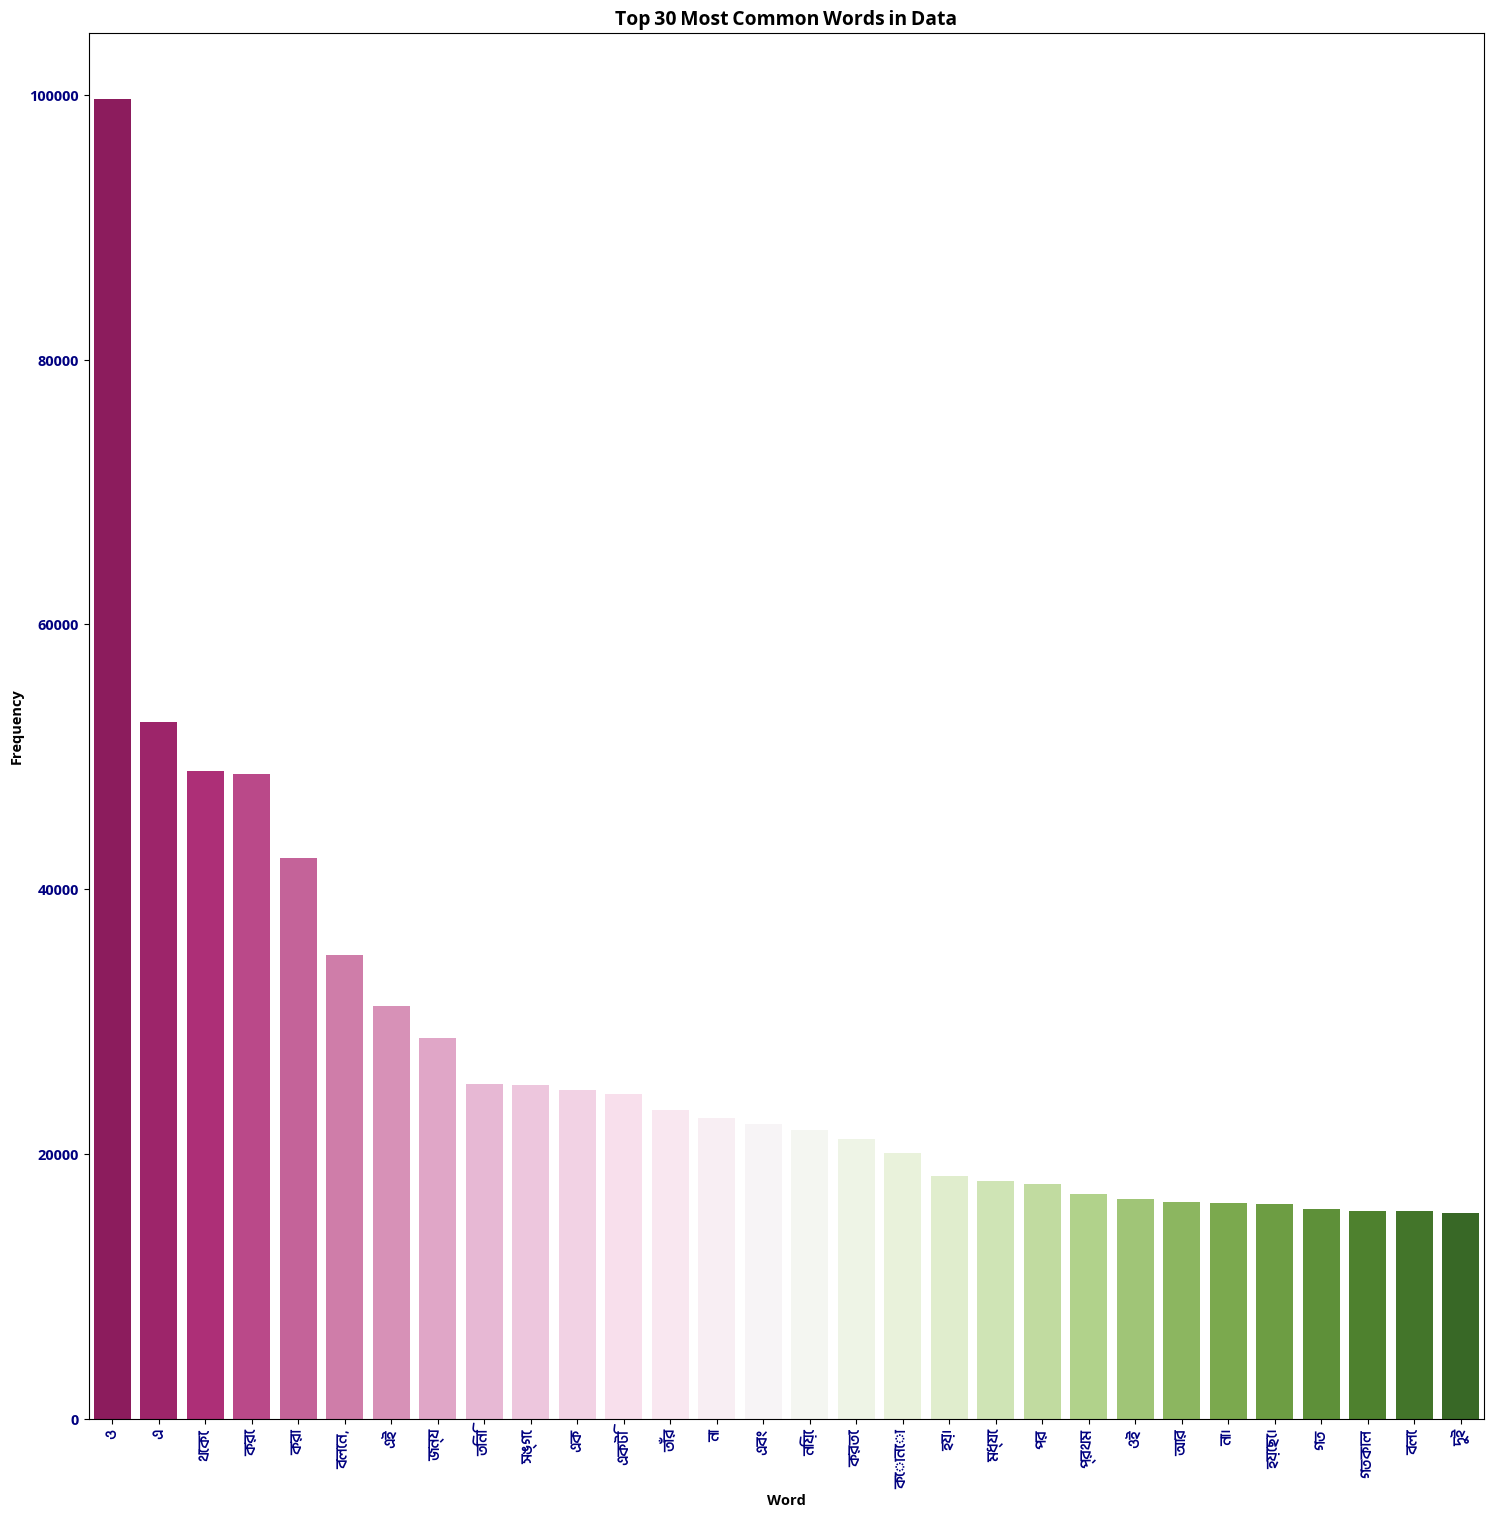

In [23]:
most_text = df["text"][: 30000]
top_words = most_text.str.split(expand=True).stack().value_counts().head(30)

plt.figure(figsize=(18, 18))
sns.barplot(x=top_words.index, y=top_words.values, palette="PiYG")

plt.title('Top 30 Most Common Words in Data', fontproperties=font_path, fontsize=20, color="black")
plt.xlabel('Word', fontproperties=font_path, fontsize=15, color="black")
plt.ylabel('Frequency', fontproperties=font_path, fontsize=15, color="black")
plt.xticks(rotation=90, fontproperties=font_path, fontsize=15, color="navy")
plt.yticks(fontproperties=font_path, fontsize=15, color="navy")

plt.show()

In [24]:
df.dropna(axis=1, how='all',inplace=True)

In [25]:
df['category_numeric'], category_mapping = pd.factorize(df['category_bn'])
category_dict = {index: label for index, label in enumerate(category_mapping)}
print(category_dict)


{0: 'বাংলাদেশ', 1: 'খেলা', 2: 'বিজ্ঞান ও প্রযুক্তি', 3: 'বিনোদন', 4: 'আন্তর্জাতিক', 5: 'অর্থনীতি', 6: 'জীবনযাপন', 7: 'মতামত', 8: 'শিক্ষা', 9: '', 10: 'পাওয়া যায়নি', 11: 'ছবি', 12: 'আজকের পত্রিকা', 13: 'রাশিয়া বিশ্বকাপ ফুটবল ২০১৮ - খেলার আপডেট নিউজ', 14: 'বিশ্বকাপ ক্রিকেট', 15: 'পরীক্ষামূলক পেজ', 16: 'অন্য আলো', 17: 'উত্তর আমেরিকা'}


In [26]:
df.drop(columns=["category_bn"],axis=1,inplace=True)

In [27]:
df.head()

,text,category_numeric
0,গাজীপুর প্রতিনিধি গাজীপুর কালিয়াকৈরে টিফিন খে...,0
1,অনলাইন ডেস্ক টেনিস সেমিফাইনাল বাধাও পেরিয়ে গে...,1
2,নিজস্ব প্রতিবেদক রাজনীতি সংসদে খালেদার অভিযোগে...,0
3,অনলাইন ডেস্ক গবেষণা পাসওয়ার্ড ভুলে যান! সহজ প...,2
4,অনলাইন ডেস্ক কম্পিউটার চলে গেলেন মাউস উদ্ভাবক ...,2


In [28]:
X=df["text"]
y=df["category_numeric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
vocab_size=50000
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
# print("Word index:", tokenizer.word_index)

In [30]:
x_train_sequences = tokenizer.texts_to_sequences(X_train)
x_test_sequences = tokenizer.texts_to_sequences(X_test)

In [31]:
max_tokens = 300
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_tokens,padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_tokens,padding='post', truncating='post')

In [32]:
print("x_train_padded shape:", x_train_padded.shape)
print("x_test_padded shape:", x_test_padded.shape)

x_train_padded shape: (326776, 300)
x_test_padded shape: (81695, 300)


In [33]:
x_train_padded.shape

(326776, 300)

In [34]:
y_train.shape

(326776,)

In [35]:
x_test_padded

array([[  109,    77,  4883, ...,   372,    55,   408],
       [  109,    77,   643, ...,   133,  6022,     0],
       [ 1506,   115,  7821, ...,     0,     0,     0],
       ...,
       [ 1230,    77, 39233, ...,    70,    10, 14641],
       [ 1398,    77,    73, ...,     0,     0,     0],
       [  122,   122, 28111, ...,     0,     0,     0]], dtype=int32)

# define parameters

In [36]:
embedding_dim=100
num_head=2
ff_dim=32
num_experts=10
batch_size=8
learning_rate=0.001
dropout_rate=0.25
num_epochs=3
num_token_per_batch=(batch_size*max_tokens)
print(f"Number of tokens per batch: {num_token_per_batch}")

Number of tokens per batch: 2400


# Implement token & position embedding layer
### It consists of two separate embedding layers, one for tokens, one for token index (positions).

In [37]:
class TokenPositionEmbedding(layers.Layer):
    def __init__(self,maxlen,vocab_size,embedding_dim):
        super().__init__()
        self.token_emb=layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim)
        self.pos_emb=layers.Embedding(input_dim=maxlen,output_dim=embedding_dim)

    def call(self,x):
        maxlen=ops.shape(x)[-1]
        positions=ops.arange(start=0,stop=maxlen,step=1)
        positions=self.pos_emb(positions)
        x=self.token_emb(x)
        return x+positions
    
    

# Implement the feedforward network

def create_feedforward_network(ff_dim,embedding_dim,name=None):
    return keras.Sequential([layers.Dense(ff_dim,activation="relu"),layers.Dense(embedding_dim)],name=name)


# Implement the load-balanced loss

def load_balanced_loss(router_probs,expert_mask):
    num_experts=ops.shape(expert_mask)[-1]
    density=ops.mean(expert_mask,axis=0)
    density_proxy=ops.mean(router_probs,axis=0)
    loss=ops.mean(density_proxy*density)*ops.cast((num_experts**2),"float32")
    return loss


# Implement the router as a layer

class Router(layers.Layer):
    def __init__(self,num_experts,expert_capacity):
        self.num_experts=num_experts
        self.route=layers.Dense(units=num_experts)
        self.expert_capacity=expert_capacity
        super().__init__()
    
    def call(self,inputs,training=False):
        router_logits=self.route(inputs)
        if training:
            router_logits+=keras.random.uniform(shape=router_logits.shape,minval=0.9,maxval=1.1)

        router_probs=keras.activations.softmax(router_logits,axis=-1)
        expert_gate,expert_index=ops.top_k(router_probs,k=1)
        expert_mask=ops.one_hot(expert_index,self.num_experts)
        aux_loss=load_balanced_loss(router_probs,expert_mask)
        self.add_loss(aux_loss)
        position_in_expert=ops.cast(ops.cumsum(expert_mask,axis=0)*expert_mask,"int32")
        expert_mask*=ops.cast(ops.less(ops.cast(position_in_expert,"int32"),self.expert_capacity),"float32")
        expert_mask_flat=ops.sum(expert_mask,axis=-1)
        expert_gate*=expert_mask_flat
        combine_tensor=ops.expand_dims(expert_gate*expert_mask_flat*ops.squeeze(ops.one_hot(expert_index,self.num_experts),1),
                                       -1)*ops.squeeze(ops.one_hot(position_in_expert,self.expert_capacity),1)
        dispatch_tensor=ops.cast(combine_tensor,"float32")
        return dispatch_tensor,combine_tensor
    
         


# Implement a Switch layer


class Switch(layers.Layer):
    
    def __init__(self, num_experts, embed_dim, ff_dim, num_token_per_batch, capacity_factor=1):
        self.num_experts = num_experts
        self.embed_dim = embed_dim
        self.experts = [create_feedforward_network(ff_dim, embed_dim) for _ in range(num_experts)]
        self.expert_capacity = num_token_per_batch // self.num_experts
        self.router = Router(self.num_experts, self.expert_capacity)
        super().__init__()
        
    def call(self, inputs):
        
        batch_size = ops.shape(inputs)[0]
        num_tokens_per_example = ops.shape(inputs)[1]
        
        # Reshape preserving batch size
        inputs_reshaped = ops.reshape(inputs, [batch_size * num_tokens_per_example, self.embed_dim])
        
        dispatch_tensor, combine_tensor = self.router(inputs_reshaped)
        
        expert_inputs = ops.einsum("ab,acd->cdb", inputs_reshaped, dispatch_tensor)
        expert_inputs = ops.reshape(expert_inputs, [self.num_experts, self.expert_capacity, self.embed_dim])
        
        expert_input_list = ops.unstack(expert_inputs, axis=0)
        expert_output_list = [self.experts[idx](expert_input) for idx, expert_input in enumerate(expert_input_list)]
        
        expert_outputs = ops.stack(expert_output_list, axis=1)
        expert_outputs_combined = ops.einsum("abc,xba->xc", expert_outputs, combine_tensor)
        
        outputs = ops.reshape(expert_outputs_combined, [batch_size, num_tokens_per_example, self.embed_dim])
        return outputs

   

# Implement a Transformer block layer

class TransformerBlock(layers.Layer):
    
    def __init__(self, embed_dim, num_heads, ffn, dropout_rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        # The ffn can be either a standard feedforward network or a switch
        # layer with a Mixture of Experts.
        self.ffn = ffn
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [38]:
num_class=len(category_dict.keys())

# Implement the classifier

**The TransformerBlock layer outputs one vector for each time step of our input sequence. Here, we take the mean across all time steps and use a feedforward network on top of it to classify text.**

In [39]:
def create_classifier():
    switch = Switch(num_experts, embedding_dim, ff_dim, num_token_per_batch)
    transformer_block = TransformerBlock(embedding_dim // num_head, num_head, switch)

    inputs = layers.Input(shape=(max_tokens,))
    embedding_layer = TokenPositionEmbedding(max_tokens, vocab_size, embedding_dim)
    x = embedding_layer(inputs)
    x = transformer_block(x)
    x = layers.Reshape((max_tokens, embedding_dim))(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(num_class, activation="softmax")(x)

    classifier = keras.Model(inputs=inputs, outputs=outputs)
    return classifier

model=create_classifier()
model.compile(optimizer=keras.optimizers.Adam(learning_rate),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_position_embedding             │ (None, 300, 100)            │       5,030,000 │
│ (TokenPositionEmbedding)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ (None, 300, 100)            │         107,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 300, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 100)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 18)                  │             594 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,140,956 (19.61 MB)

 Trainable params: 5,140,956 (19.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(x_train_padded,y_train,batch_size=batch_size,epochs=num_epochs,
                         validation_data=(x_test_padded, y_test))

Epoch 1/3
40847/40847 ━━━━━━━━━━━━━━━━━━━━ 461s 11ms/step - accuracy: 0.9405 - loss: 1.2319 - val_accuracy: 0.9759 - val_loss: 1.0931
Epoch 2/3
40847/40847 ━━━━━━━━━━━━━━━━━━━━ 437s 11ms/step - accuracy: 0.9796 - loss: 1.0793 - val_accuracy: 0.9780 - val_loss: 1.0616
Epoch 3/3
40847/40847 ━━━━━━━━━━━━━━━━━━━━ 436s 11ms/step - accuracy: 0.9841 - loss: 1.0621 - val_accuracy: 0.9769 - val_loss: 1.0603


# Loss & Accuracy Graph

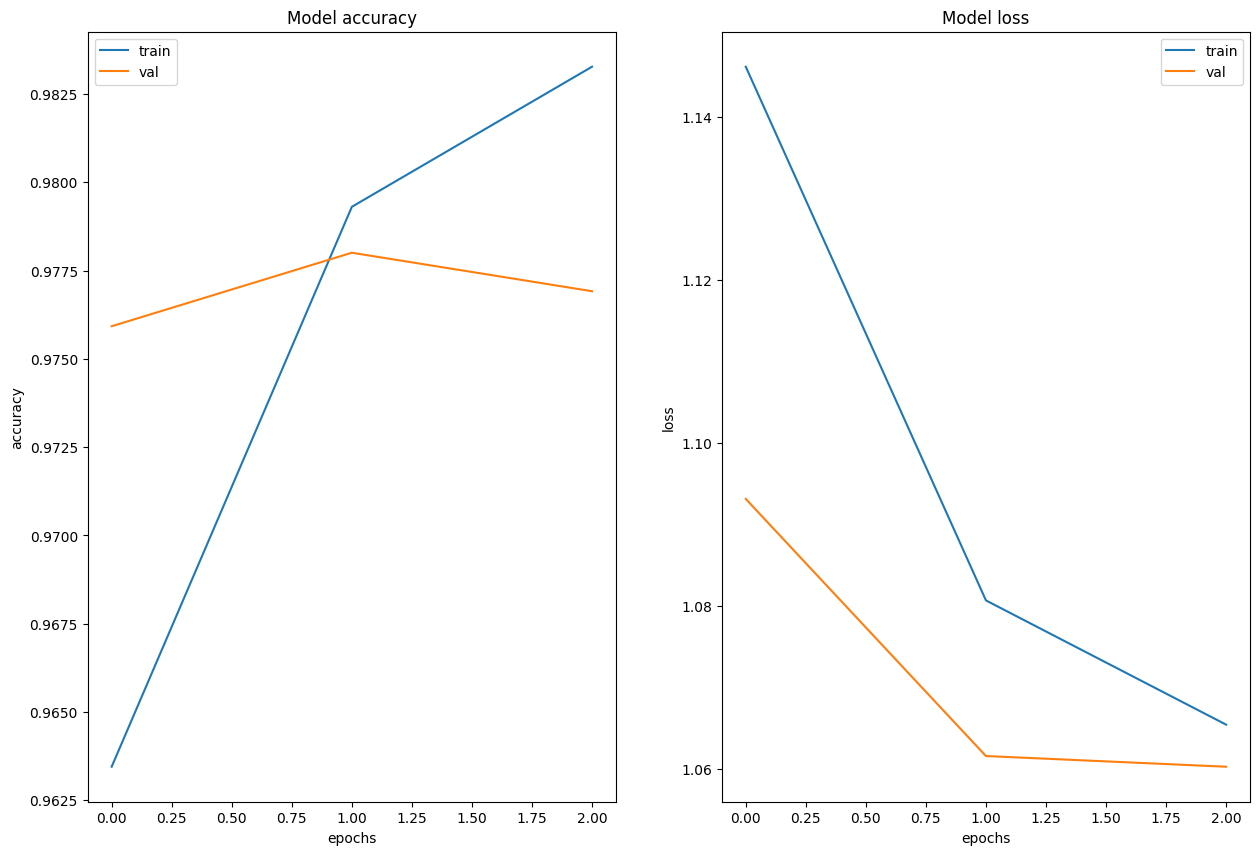

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])
plt.show()

In [42]:
label_names = [
   'Bangladesh', 'Sports', 'Science and Technology', 'Entertainment', 
   'International', 'Economy', 'Lifestyle', 'Opinion', 'Education', 
   'Not Found', 'Images', 'Today\'s Newspaper', 
   'Russia World Cup Football 2018 - Sports News Update', 
   'World Cup Cricket', 'Experimental Page', 'Other Light', 'North America'
]

# Confusion matrix visualization

2553/2553 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step


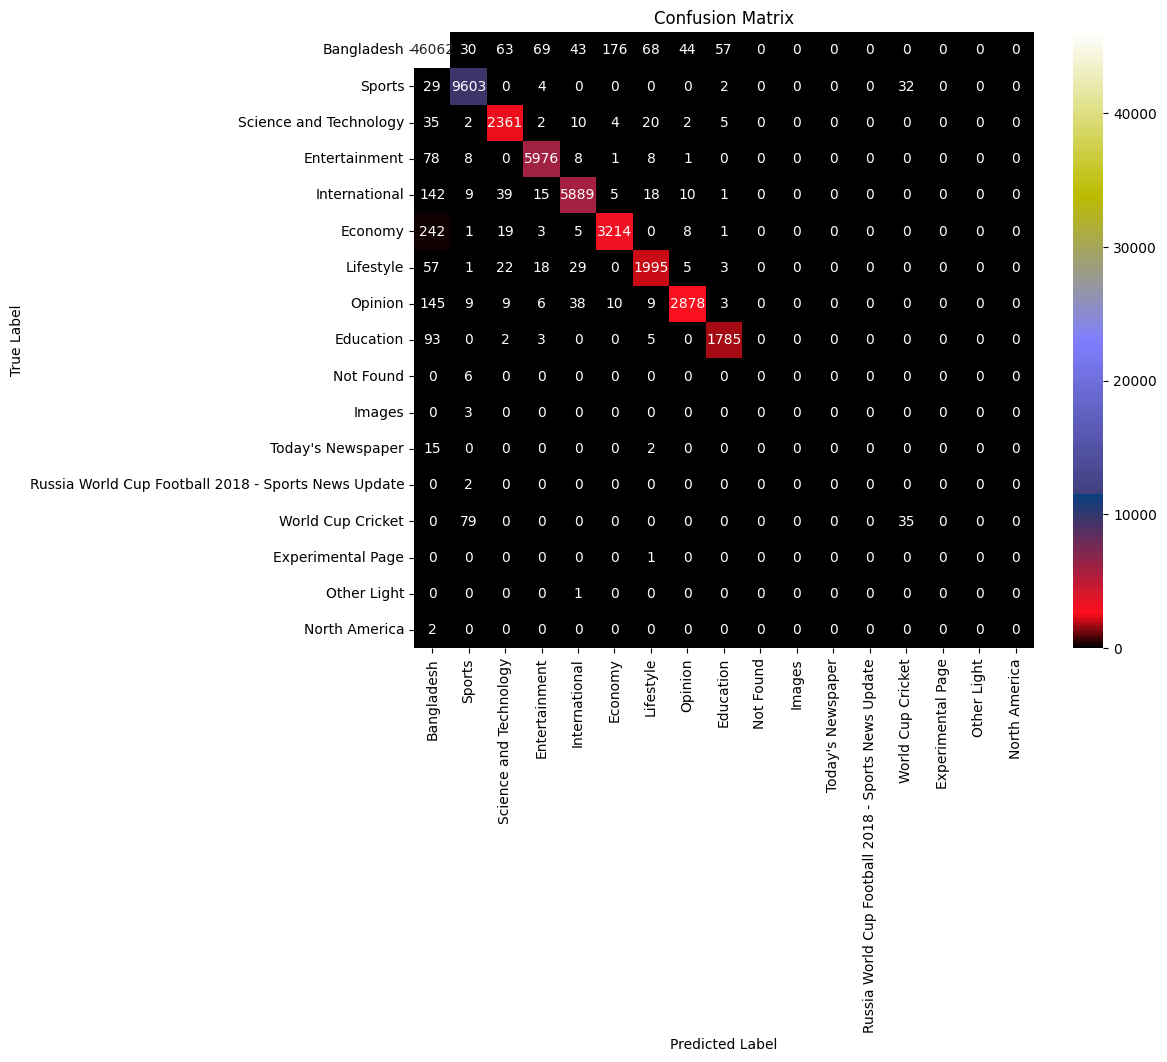

In [43]:

y_pred = model.predict(x_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='gist_stern',xticklabels=label_names,yticklabels=label_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [44]:
print(classification_report(y_test,y_pred_classes,target_names=label_names))

                                                     precision    recall  f1-score   support

                                         Bangladesh       0.98      0.99      0.99     46612
                                             Sports       0.98      0.99      0.99      9670
                             Science and Technology       0.94      0.97      0.95      2441
                                      Entertainment       0.98      0.98      0.98      6080
                                      International       0.98      0.96      0.97      6128
                                            Economy       0.94      0.92      0.93      3493
                                          Lifestyle       0.94      0.94      0.94      2130
                                            Opinion       0.98      0.93      0.95      3107
                                          Education       0.96      0.95      0.95      1888
                                          Not Found       0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes,average="macro")
recall = recall_score(y_test, y_pred_classes,average="macro")
f1 = f1_score(y_test, y_pred_classes,average="macro")

print("#"*80)
print(f"Accuracy: {accuracy:.4f}")
print("#"*80)
print(f"Precision: {precision:.4f}")
print("#"*80)
print(f"Recall: {recall:.4f}")
print("#"*80)
print(f"F1 Score: {f1:.4f}")
print("#"*80)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


################################################################################
Accuracy: 0.9768
################################################################################
Precision: 0.5414
################################################################################
Recall: 0.5252
################################################################################
F1 Score: 0.5316
################################################################################


# roc curve

2553/2553 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


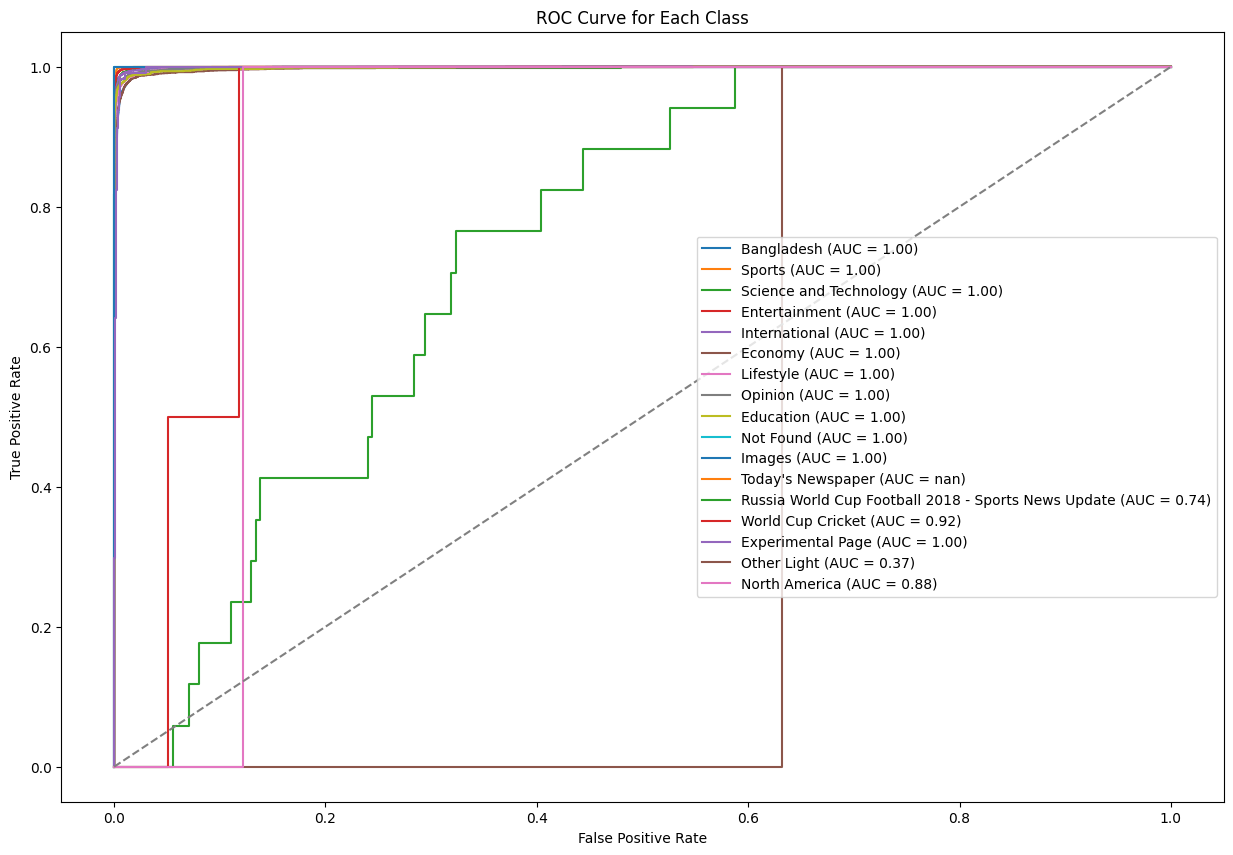

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarize y_test for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_names)))

# Get predicted probabilities for each class
y_pred_prob = model.predict(x_test_padded)

# Plot ROC curves
plt.figure(figsize=(15, 10))

for i, label in enumerate(label_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


# precison recall curve

2553/2553 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


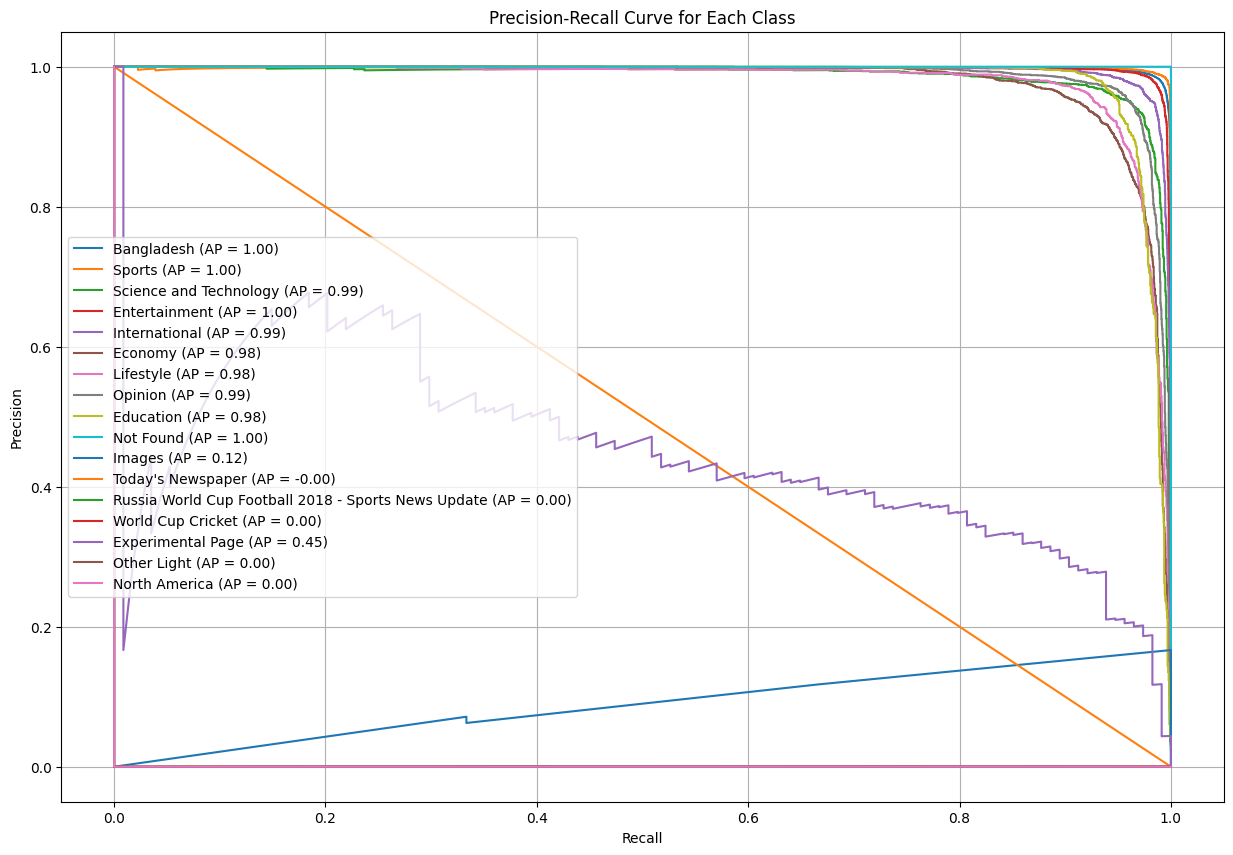

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score


# Binarize y_test for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_names)))

# Get predicted probabilities for each class
y_pred_prob = model.predict(x_test_padded)

# Plot Precision-Recall curves
plt.figure(figsize=(15, 10))

for i, label in enumerate(label_names):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_prec = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'{label} (AP = {avg_prec:.2f})')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.grid()
plt.show()


# Custom Data Prediction

In [48]:
test_data = [
    "জনপ্রিয় ব্রিটিশ গায়ক এড শিরান এখন আছেন ভারত সফরে। তবে গতকাল রোববার অনুরাগীদের চমকে দিয়ে রাস্তার পাশেই গাইতে শুরু করেন তিনি। এরপর পুলিশ এসে তাঁকে থামিয়ে দেয়। যে ঘটনা নিয়ে শুরু হয়েছে বিতর্ক। পক্ষে-বিপক্ষে যুক্তি দিচ্ছেন অনেকে। খবর হিন্দুস্তান টাইমসের।",
    "রান বিচারে হয়তো কিছু না, কিন্তু সামর্থ্য বিচারে ব্যাপারটা অবিশ্বাস্যই। ওয়ানডেতে কেইন উইলিয়ামসন সর্বশেষ এক অঙ্কের রানে আউট হয়েছেন ছয় বছর আগে, অর্থাৎ ক্রিজে আসার পর তাঁর টিকে থাকার সামর্থ্যটা পরিষ্কার।",
    "আমাদের মাদ্রাসাটি ১৯৬৯ সালে প্রতিষ্ঠিত। আমি ১৯৯৫ সালে এ মাদ্রাসার সুপার পদে চাকরিতে যোগদান করেছি। এখনো আমাদের মাদ্রাসাটি এমপিওভুক্ত হয়নি। আমি চলতি মাসের ২৮ তারিখে অবসরে যাচ্ছি। সারা জীবন চাকরি করে বেতন পেলাম না।",
    "ফিলিস্তিনের গাজা উপত্যকার নিয়ন্ত্রণ নেওয়ার ইচ্ছা পুনর্ব্যক্ত করেছেন যুক্তরাষ্ট্রের প্রেসিডেন্ট ডোনাল্ড ট্রাম্প। যুদ্ধবিধ্বস্ত উপত্যকাটিকে একটি ‘বড় রিয়েল এস্টেট সাইট’ (বড় আবাসন এলাকা) মনে করেন তিনি।",
    "বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছেন, দেশে আইনশৃঙ্খলা পরিস্থিতির অবনতি হয়েছে। সাম্প্রতিক ঘটনাগুলোর দায় সরকার এড়াতে পারে না।"
]

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(test_data)
padded_data = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(padded_data, maxlen=max_tokens, padding="post", truncating="post")

pred = model.predict(test_padded)
final_predict = np.argmax(pred, axis=1)

category_list = list(category_dict.values())
predicted_labels = [category_list[i] if i < len(category_list) else "Unknown" for i in final_predict]

for i, (text, label) in enumerate(zip(test_data, predicted_labels)):
    print(f"{i+1}. Predicted Category: {label}")
    print(f"   Text Snippet: {text}...\n")
    print("#"*200)




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. Predicted Category: খেলা
   Text Snippet: জনপ্রিয় ব্রিটিশ গায়ক এড শিরান এখন আছেন ভারত সফরে। তবে গতকাল রোববার অনুরাগীদের চমকে দিয়ে রাস্তার পাশেই গাইতে শুরু করেন তিনি। এরপর পুলিশ এসে তাঁকে থামিয়ে দেয়। যে ঘটনা নিয়ে শুরু হয়েছে বিতর্ক। পক্ষে-বিপক্ষে যুক্তি দিচ্ছেন অনেকে। খবর হিন্দুস্তান টাইমসের।...

########################################################################################################################################################################################################
2. Predicted Category: খেলা
   Text Snippet: রান বিচারে হয়তো কিছু না, কিন্তু সামর্থ্য বিচারে ব্যাপারটা অবিশ্বাস্যই। ওয়ানডেতে কেইন উইলিয়ামসন সর্বশেষ এক অঙ্কের রানে আউট হয়েছেন ছয় বছর আগে, অর্থাৎ ক্রিজে আসার পর তাঁর টিকে থাকার সামর্থ্যটা পরিষ্কার।...

########################################################################################################################################################################################################
3. Predicted C